In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf

In [2]:
filename = "data_zillow_house_prices-proj2.csv"
df = pd.read_csv(filename)
data = df[df["RegionName"].isin(["Boston, MA"])].iloc[0, 5:]
data = data.astype(np.float64)
data.index = pd.to_datetime(data.index)
train = data.loc["2010-01-01":"2017-12-31"]
train

2010-01-31    352001.0
2010-02-28    353713.0
2010-03-31    354899.0
2010-04-30    356066.0
2010-05-31    356716.0
                ...   
2017-08-31    452393.0
2017-09-30    454372.0
2017-10-31    455955.0
2017-11-30    459183.0
2017-12-31    461409.0
Name: 11, Length: 96, dtype: float64

In [3]:
test = data.loc["2018-01-01":"2019-12-31"]
print("test.shape =", test.shape)
test

test.shape = (24,)


2018-01-31    464123.0
2018-02-28    466719.0
2018-03-31    470227.0
2018-04-30    472858.0
2018-05-31    475336.0
2018-06-30    477316.0
2018-07-31    478886.0
2018-08-31    480190.0
2018-09-30    480991.0
2018-10-31    482472.0
2018-11-30    483526.0
2018-12-31    484936.0
2019-01-31    486288.0
2019-02-28    487146.0
2019-03-31    486783.0
2019-04-30    485946.0
2019-05-31    485379.0
2019-06-30    485838.0
2019-07-31    485973.0
2019-08-31    486692.0
2019-09-30    488060.0
2019-10-31    489468.0
2019-11-30    490736.0
2019-12-31    492230.0
Name: 11, dtype: float64

In [4]:
train.index[-50]

Timestamp('2013-11-30 00:00:00')

In [5]:
acf = np.round(acovf(train) / 1e6, 2)
acf

array([1442.88, 1403.7 , 1363.79, 1324.13, 1283.63, 1242.5 , 1200.3 ,
       1157.92, 1115.21, 1071.82, 1028.09,  983.55,  938.19,  892.5 ,
        846.27,  800.17,  753.63,  706.83,  659.16,  610.86,  563.23,
        516.41,  469.94,  423.98,  378.42,  333.34,  288.23,  243.64,
        199.83,  156.67,  114.14,   72.87,   31.9 ,   -8.95,  -49.95,
        -89.66, -127.04, -162.46, -196.59, -230.33, -263.78, -296.92,
       -329.6 , -361.65, -392.45, -421.43, -448.63, -474.47, -499.36,
       -522.92, -545.41, -566.11, -584.29, -599.54, -612.61, -623.91,
       -633.35, -640.24, -643.71, -644.52, -642.65, -638.68, -631.52,
       -621.93, -610.97, -599.01, -585.95, -571.18, -555.08, -537.29,
       -517.79, -497.09, -475.94, -454.63, -433.25, -412.1 , -391.4 ,
       -371.06, -350.68, -330.71, -310.6 , -290.61, -270.9 , -251.69,
       -232.82, -213.66, -194.33, -175.74, -157.86, -140.89, -123.76,
       -106.12,  -87.77,  -68.36,  -47.58,  -24.85])

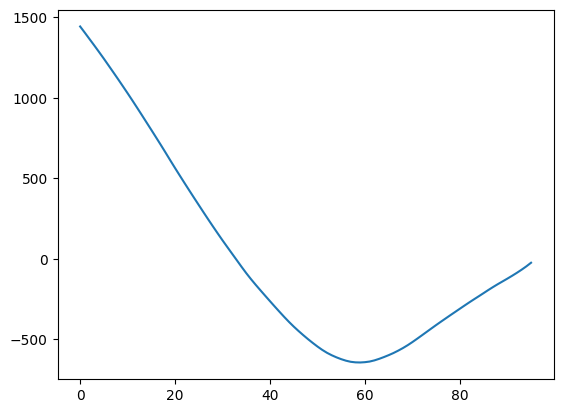

In [6]:
plt.plot(acf)

In [7]:
np.hstack([np.array((1, 2, 3))[:, np.newaxis], np.array((4, 5, 6))[:, np.newaxis]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [8]:
def construct_Hankel(series, m, L):
    series = series.to_numpy()
    num_cols = L-m+1
    H = series[:m][:, np.newaxis]
    for j in range(1, num_cols):
        H = np.hstack([H, series[j:m+j][:, np.newaxis]])
    return H

m = 10
L = 50

H = construct_Hankel(train, m, L)

U, S, Vh = np.linalg.svd(H)
print("U.shape =", U.shape)
print("S.shape =", np.diag(S).shape)
print("Vh.shape =", Vh.shape)
S

U.shape = (10, 10)
S.shape = (10, 10)
Vh.shape = (41, 41)


array([7.03585688e+06, 8.83302374e+04, 1.64967133e+04, 7.18010902e+03,
       4.99576741e+03, 2.63934200e+03, 1.40689575e+03, 1.30552078e+03,
       8.21869785e+02, 6.54171967e+02])

[0.983 0.995 0.997 0.998 0.999 0.999 1.    1.    1.    1.   ]


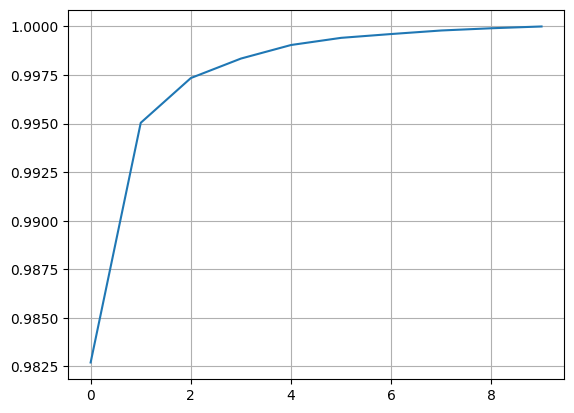

In [9]:
print(np.round(S.cumsum() / S.sum(), 3))
plt.plot(S.cumsum() / S.sum())
plt.grid()

# Last row estimation

In [10]:
def construct_Hankel(series, m, L):
    series = series.to_numpy()
    num_cols = L-m+1
    H = series[:m][:, np.newaxis]
    for j in range(1, num_cols):
        H = np.hstack([H, series[j:m+j][:, np.newaxis]])
    return H

def construct_H_hat(H, r):
    U, S, Vh = np.linalg.svd(H)
    print("U.shape =", U.shape)
    print("S.shape =", np.diag(S).shape)
    print("Vh.shape =", Vh.shape)
    r = 2
    S_r = np.diag(S)
    S_r[r:, r:] = 0
    S_r = np.hstack([S_r, np.zeros((S_r.shape[0], Vh.shape[0] - S_r.shape[1]))])
    H_hat = U @ S_r @ Vh
    print("H_hat.shape =", H_hat.shape)
    
    return H_hat

In [11]:
import statsmodels.api as sm

In [12]:
m = 10
L = 50
r = 2

H_valid = construct_Hankel(train, m, L)
H_hat_valid = construct_H_hat(H_valid, r)

print("H_valid.shape =", H_valid.shape)
print("H_hat_valid.shape =", H_hat_valid.shape)

y = H_valid[-1, :][np.newaxis, :].T
X = H_hat_valid[:-1, :].T
print("y.shape =", y.shape)
print("X.shape =", X.shape)

# OLS
model = sm.OLS(y, X).fit()

print("Num of residuals:", len(model.resid))
print("Max abs of residuals:", abs(model.resid).max())

beta = model.params[:, np.newaxis]
beta_manual = np.linalg.inv(X.T @ X) @ X.T @ y
print("beta =\n", beta)
print("beta_manual =\n", beta_manual)

U.shape = (10, 10)
S.shape = (10, 10)
Vh.shape = (41, 41)
H_hat.shape = (10, 41)
H_valid.shape = (10, 41)
H_hat_valid.shape = (10, 41)
y.shape = (41, 1)
X.shape = (41, 9)
Num of residuals: 41
Max abs of residuals: 3293.2945632570772
beta =
 [[-0.2054957 ]
 [-0.13849696]
 [-0.06430727]
 [ 0.01592459]
 [ 0.10164352]
 [ 0.19065805]
 [ 0.28043368]
 [ 0.3682717 ]
 [ 0.45259089]]
beta_manual =
 [[-1.69607741]
 [-5.32754675]
 [ 3.14411634]
 [ 2.51268807]
 [ 2.89646443]
 [-1.81081802]
 [-2.71397613]
 [ 2.23322292]
 [ 0.17423393]]


In [13]:
# Last row plot
last_row_forecast = beta_manual.T @ H_hat_valid[:-1, :]
last_row_forecast

array([[-208406.98178242, -214102.28952241, -218179.94920466,
        -220856.87067735, -222363.00674188, -223253.8019591 ,
        -223003.50800124, -221966.834734  , -219854.85268738,
        -218449.64490986, -217728.86917002, -218137.57061497,
        -218438.06317442, -218454.51850206, -218251.01578294,
        -218275.36727149, -217591.94742123, -215731.19620946,
        -211921.51315214, -207113.90164532, -202016.29656552,
        -197380.85789959, -193775.79338248, -191490.26594569,
        -189937.45275008, -188824.714491  , -187470.52078282,
        -186448.98204324, -184581.18689721, -181751.05940924,
        -177908.14422403, -174152.65591509, -171763.14670193,
        -171269.15180924, -172161.40216921, -173376.28147119,
        -174696.051803  , -177545.64311865, -181273.05620161,
        -185152.56141312, -188176.36844704]])

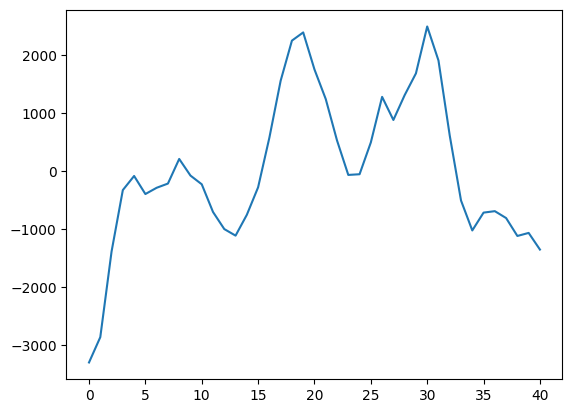

In [14]:
plt.plot(model.resid)

In [15]:
m = 10
L = 33
r = 2

H_valid = construct_Hankel(train.iloc[-L:], m, L)
H_hat_valid = construct_H_hat(H_valid, r)

y = test
X = H_hat_valid.T
print("y.shape =", y.shape)
print("X.shape =", X.shape)
# OLS
model = sm.OLS(y, X).fit()
abs(model.resid).max()

U.shape = (10, 10)
S.shape = (10, 10)
Vh.shape = (24, 24)
H_hat.shape = (10, 24)
y.shape = (24,)
X.shape = (24, 10)


14844.35196024389

In [16]:
construct_H_hat(H, r=2)

U.shape = (10, 10)
S.shape = (10, 10)
Vh.shape = (41, 41)
H_hat.shape = (10, 41)


array([[354822.19800655, 356563.05981783, 357612.96350482,
        358073.93759478, 357965.93857221, 357459.6833105 ,
        356453.491844  , 355135.21959868, 353500.36813956,
        352166.32458056, 351111.12979562, 350408.39603782,
        349550.19496096, 348501.00265166, 347382.40548661,
        346402.32223757, 345265.92677988, 343865.52536031,
        341930.42082156, 339841.99378955, 337792.53184676,
        336109.65576532, 334952.75438623, 334399.28079698,
        334264.46262474, 334501.09678957, 334880.83487224,
        335436.30410758, 335848.04498281, 336117.37319503,
        336367.20163935, 336839.66673679, 337893.89435742,
        339683.96949354, 342015.31945983, 344553.53182693,
        347152.80691625, 350328.56826968, 353714.03287202,
        357042.67195988, 359853.96239682],
       [354832.46516883, 356222.71063998, 357012.91728237,
        357293.33592812, 357067.54664903, 356472.11316446,
        355440.32511643, 354141.70467616, 352593.23748082,
        35130